<a href="https://colab.research.google.com/github/gterashi/DAQplugin/blob/main/DAQ_Score_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAQ-Score: A Deep-learning-based residue-wise Quality Assessment score for cryo-EM models
- Map-grid based fast version
<a href="https://github.com/marktext/marktext/releases/latest">
   <img src="https://img.shields.io/badge/DAQ-v1.0.0-green">
   <img src="https://img.shields.io/badge/platform-Linux%20%7C%20Mac%20-green">
   <img src="https://img.shields.io/badge/Language-python3-green">
   <img src="https://img.shields.io/badge/Language-C-green">
   <img src="https://img.shields.io/badge/dependencies-tested-green">
   <img src="https://img.shields.io/badge/licence-GNU-green">
</a>      

<p align="center">
  <img src="https://user-images.githubusercontent.com/50850224/184958409-88da0757-6cf3-400a-8de5-7695d3519226.png" width="300">
</p>
DAQ is a computational tool using deep learning that can estimate the residue-wise local quality for protein models from cryo-Electron Microscopy (EM) maps.  

[Terashi, G., Wang, X., Maddhuri Venkata Subramaniya, S.R., Tesmer, J. J., & Kihara, D.. Residue-wise local quality estimation for protein models from cryo-EM maps. Nat Methods 19, pages 1116–1125 (2022). https://doi.org/10.1038/s41592-022-01574-4](https://www.nature.com/articles/s41592-022-01574-4)

Copyright (C) 2021 Genki Terashi* , Xiao Wang*, Sai Raghavendra Maddhuri Venkata Subramaniya, John J. G. Tesmer, and Daisuke Kihara, and Purdue University.

License: GPL v3 for academic use. (For commercial use, please contact us for different licensing.)

Contact: Daisuke Kihara (dkihara@purdue.edu)

For technical problems or questions, please reach to Genki Terashi (gterashi@purdue.edu).

**We strongly suggest to use Google Chrome for DAQ-Score Colab version. Other browsers such as Safari may raise errors when uploading or downloading files.**

If you are using other browsers, disabling tracking protection may help resolve the errors when uploading or downloading files.

For more details, see **<a href="#Instructions">Instructions</a>** of the notebook and checkout the **[DAQ GitHub](https://github.com/gterashi/DAQplugin)**. If you use DAQ score, please cite it: **<a href="#Citation">Citation</a>**.

# Protocol of DAQ-score
![](https://user-images.githubusercontent.com/50850224/142276557-c79df306-5cf9-40f9-a0b8-f7ef08176a7a.jpeg)

#Overview of DAQ
### <center>$ DAQ(AA)(i) = \log{(\frac{P_{aa(i)}(i)}{\sum_{j}(P_{aa(i)}(j)/N)})} $</center>

where $aa(i)$ is the amino acid type of residue i, $P_{aa(i)}(i)$ is the computed probability for amino acid type $aa(i)$ for the nearest grid point to the Cα atom of residue $i$. As shown in the equation, the probability is normalized by the average probability of amino acid type $aa(i)$ across over all atom positions in the protein model.

* If the assignment is correct, DAQ will be positive, and negative if the assignment may be incorrect.

* If a position in the map does not have distinct density pattern for the assigned amino acid (or secondary structure, Calpha atom), DAQ will be close to 0.

* If the entire model is fitted poorly? In that case, simply all the residues in the model will have a negative score, indicating that each residue in the model may be incorrectly assigned.

# Instructions <a name="Instructions"></a>

**Quick start**
1. Connect to a gpu machine by clicking the right top button **"connect"** in the notebook, then we can run DAQ under GPU support.
2. Upload your map file in the **Files Tab** on the left.

<img src="https://github.com/gterashi/DAQplugin/blob/main/img/files.png?raw=true" width="200">

3. Specify the Parameters in <a href="#Param">Parameters</a>. 
4. Running DAQ by clicking the **Run all** button at top.

**Result in zip file**
1. Prediction File ([MapID]_*.npy): This file contains pre-computed DAQ scores for each grid point. ChimeraX plugin of DAQ (https://github.com/gterashi/DAQplugin) visualize DAQ scores on realtime.
2. An overall score PDB file, where scores of all residues are saved in b-factor column.

# Run DAQ-Score Online



In [4]:
#@title Check Input Map file (One file) and PDB/CIF files.
#@markdown Please upload your map files. This notbook automatically detect files.<br>
#@markdown If you upload PDB/CIF files, this DAQ score will be computed for each protein structure model.<br>
import os
%cd /content
from pathlib import Path

content_dir = Path("/content")
model_ext = {".pdb", ".cif", ".mmcif"}
map_ext = {".map", ".mrc"}

model_files = sorted(
    [p for p in content_dir.iterdir()
     if p.is_file() and p.suffix.lower() in model_ext],
    key=lambda p: p.name.lower()
)

map_files = sorted(
    [p for p in content_dir.iterdir()
     if p.is_file() and p.suffix.lower() in map_ext],
    key=lambda p: p.name.lower()
)

if len(map_files) == 0:
  raise RuntimeError(
      "No MAP/MRC file found in /content."
      "Please upload at least one file."
  )

if len(map_files) > 1 :
  raise RuntimeError(
      "Multiple Map files were detected in /content."
      "Please upload one map file."
  )


EXE_DAQ_SCORING = False
#One map and one or multiple models.
if len(model_files)>0 and len(map_files)==1:
  EXE_DAQ_SCORING = True

OUT_DATA_DIR="/content/OutPuts"
os.makedirs(OUT_DATA_DIR, exist_ok=True)


/content


In [ ]:
#@title Install dependencies <a name="Dependency"></a>
#@markdown Please make sure the notebook is already connected to **GPU**, DAQ needs GPU support to run.<br>
#@markdown Click the right top button **"connect"**, then the notebook will automatically connect to a gpu machine
%cd /content
import urllib.request

#get_url= urllib.request.urlopen('https://kiharalab.org/emsuites/daq_count.php?pwd=daq_dklab')
#print(get_url)
!pip install mrcfile
!pip install numpy
!pip install numba
!pip install torch
!pip install scipy
!pip install tqdm
!pip -q install "zarr<3" "numcodecs"
!git clone --recurse-submodules https://github.com/gterashi/DAQplugin.git
%cd /content/DAQplugin


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 117.8 MB/s eta 0:00:00
/content/DAQplugin


In [7]:
# ===== Verify imports (Colab) =====
import numpy as np
import mrcfile
from tqdm import tqdm
import map_util.prep_points_from_mrc as prep
from map_util.dataset_map import MapPointPatchDataset
import DiffModeler.data_processing.Resize_Map as resize_map

import zarr, numcodecs, inspect
print("zarr:", getattr(zarr, "__version__", "unknown"))
print("numcodecs:", getattr(numcodecs, "__version__", "unknown"))
print("has zarr.Blosc?", hasattr(zarr, "Blosc"))
print("Imports OK")

zarr: 2.18.7
numcodecs: 0.15.1
has zarr.Blosc? True
Imports OK


In [ ]:

from google.colab import files
import os
import os.path
import re
import hashlib
from pathlib import Path
#@markdown Specify other parameters(optional) <a name="Param"></a>
contour = '0.0' #@param {type:"string"}
#@markdown author recommended contour level for the input map. Using contour level will not have any impact on the result, but can reduce the computation time. ```
#@markdown <br>default: 0. Suggested Range: [0,author_contour]

stride = '2'#@param {type:"string"}
#@markdown Detailed explanation can be seen: [stride_definition](https://deepai.org/machine-learning-glossary-and-terms/stride)<br>
#@markdown stride step for scanning the cryo-EM map. Increasing the stride can reduce the computation time but may lead to unreliable result.<br> default stride: 1(integer). Suggested range: [1,4].
batch_size = '512'#default param

map_input_path = map_files[0]
p = Path(map_input_path)
map_id = p.stem

Protein_list=[
    {
        'pdb_id':"NA",
        'emdb_id': map_id,
        "contour": contour,
        'map_path': map_input_path,
    }
]


[{'pdb_id': 'NA', 'emdb_id': 'emd_22458', 'contour': '0.0035', 'map_path': PosixPath('/content/emd_22458.mrc')}]


In [9]:
#from map_util.dataset_map import *
import map_util.prep_points_from_mrc as prep
#import map_util.dataset_map as cif_parsing
import os, json,importlib
import DiffModeler.data_processing.Resize_Map as resize_map

root = "/content/OutPuts"  # Output dir
max_points = 500000
stride = int(stride) #every 2 voxels
os.makedirs(f"{root}/resampled_map", exist_ok=True)
os.makedirs(f"{root}/DAQinp", exist_ok=True)
summary = []
for l in Protein_list:
    e={}
    pdbid=l['pdb_id']
    emid=l['emdb_id']
    map_file_path=l["map_path"]
    cif_file_path="NA"

    #resample
    new_map_path = os.path.join(f"{root}/resampled_map", f"{emid}_resampled.map")
    if not os.path.exists(new_map_path):
        resize_map.Resize_Map(map_file_path, new_map_path)


    e ={
        'pdb_id': pdbid,
        'emdb_id': emid,
        'map_path': new_map_path,
        'cif_path': cif_file_path,
        'contour': float(l['contour'])
    }

    out_dir, npts = prep.build_one(e, out_root=f'{root}/DAQinp', max_points=max_points, stride=stride)
    summary.append({'out_dir': out_dir, 'n_points': int(npts)})
    print(f"Built {out_dir}  points={npts}")


/content/DAQplugin/DiffModeler/data_processing/Resize_Map.py:9: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad() and torch.cuda.amp.autocast(enabled=use_gpu):


[/content/emd_22458.mrc] Original Shape (ZYX): torch.Size([320, 320, 320])
[/content/emd_22458.mrc] Original Voxel Size (ZYX): 0.8500, 0.8500, 0.8500
[/content/emd_22458.mrc] New Grid Size (ZYX): 272.00000762939453, 272.00000762939453, 272.00000762939453
[/content/emd_22458.mrc] New Grid Size (int) (ZYX): 272, 272, 272
[/content/emd_22458.mrc] New Shape (ZYX): (272, 272, 272)
[/content/emd_22458.mrc] New Voxel Size (ZYX): 1.0000, 1.0000, 1.0000
Saved zarr volume to: /content/OutPuts/DAQinp/emd_22458_resampled/map.zarr
Built /content/OutPuts/DAQinp/emd_22458_resampled  points=37132


DAQ scoring part

In [10]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch import nn
from DAQ.models.resnet import resnet18 as resnet18_multi
from map_util.dataset_map import MapPointPatchDataset
#Setting
CKPT_PATH = f"/content/DAQplugin/DAQ/best_model/qa_model/Multimodel.pth"  # state_dictを含む.pth/.pt
PATCH_NPY  = "patches.npy"                  # (N,1,V,V,V) float32
VOXEL_SIZE = 11                             #
BATCH      = 1024
OUT_PREFIX = "out"                          # out_pred1.npy
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"


data = MapPointPatchDataset(root=f"{root}/DAQinp",
                            map_ids=[f"{map_id}_resampled"],
                            Np=summary[0]['n_points'],
                            patch_vox=11)
sample = data[0]
patches = sample['patches']
points  = sample['points']

if isinstance(patches, torch.Tensor):
    patches = patches.cpu()
V = patches.shape[-1]
assert V == 11, f"VOXEL_SIZE is not 11. Please check: {V}"

if patches.ndim == 4:
    # (N,11,11,11) → (N,1,11,11,11)
    patches = patches.unsqueeze(1)
elif patches.ndim == 3:
    # (11,11,11) → (1,1,11,11,11)
    patches = patches.unsqueeze(0).unsqueeze(0)
elif patches.ndim == 5:
    pass
else:
    raise ValueError(f"Unexpected patch shape: {patches.shape}")
patches = patches.to(torch.float32).numpy()

print(patches.shape)
SWAP_XZ = True
if SWAP_XZ:
    # (N,1,X,Y,Z) -> (N,1,Z,Y,X)
    patches = np.transpose(patches, (0, 1, 4, 3, 2)).copy()
    print(patches.shape)

(37132, 1, 11, 11, 11)
(37132, 1, 11, 11, 11)


In [11]:
# DataLoader ---
class PatchDS(Dataset):
    def __init__(self, arr):  # arr: (N,1,V,V,V) float32
        self.x = arr
    def __len__(self): return self.x.shape[0]
    def __getitem__(self, i):
        v = self.x[i]  # (1,V,V,V)
        #print(v.shape)
        #Align with DAQ-score trim-map
        #no normalization as DAQ
        #m, s = v.mean(), v.std() + 1e-6
        #v = (v - m) / s

        return torch.from_numpy(v)

# Load Model
def load_model(ckpt_path, voxel_size):
    model = resnet18_multi(sample_size=voxel_size).to(DEVICE)
    model = nn.DataParallel(model)
    sd = torch.load(ckpt_path, map_location="cpu")
    if isinstance(sd, dict) and "state_dict" in sd:
        sd = sd["state_dict"]
    model.load_state_dict(sd, strict=True)
    model.eval()
    return model

dl = DataLoader(PatchDS(patches), batch_size=BATCH,
                shuffle=False, num_workers=4, pin_memory=True)

model = load_model(CKPT_PATH, V)

# Prediction Part
pred1_all, pred2_all, pred3_all = [], [], []
with torch.no_grad():
    for b in tqdm(dl):
        b = b.to(DEVICE)                       # (B,1,11,11,11)
        p1, p2, p3 = model(b)                  # logits
        pred1_all.append(F.softmax(p1, 1).cpu().numpy())
        pred2_all.append(F.softmax(p2, 1).cpu().numpy())
        pred3_all.append(F.softmax(p3, 1).cpu().numpy())

pred1 = np.concatenate(pred1_all, 0)  # (N,C1)
pred2 = np.concatenate(pred2_all, 0)  # (N,C2)
pred3 = np.concatenate(pred3_all, 0)  # (N,C3)

if isinstance(points, torch.Tensor):
    points = points.detach().cpu().numpy()
if isinstance(pred1, torch.Tensor):
    pred1 = pred1.detach().cpu().numpy()
if isinstance(pred2, torch.Tensor):
    pred2 = pred2.detach().cpu().numpy()
if isinstance(pred3, torch.Tensor):
    pred3 = pred3.detach().cpu().numpy()

assert points.shape[0] == pred1.shape[0] == pred2.shape[0] == pred3.shape[0], \
    "#points != #prediction"

#DAQ log score
## Reference values
eps = 1e-12
ref_aa = pred1.mean(axis=0)                    # (20,)
ref_aa = np.clip(ref_aa, eps, 1.0)
#print(ref_aa)
ref_atom = pred2.mean(axis=0)                    # (6,)
ref_atom = np.clip(ref_atom, eps, 1.0)
#print(ref_atom)
ref_ss = pred3.mean(axis=0)                    # (3,)
ref_ss = np.clip(ref_ss, eps, 1.0)
#print(ref_ss)
pred1_logratio = np.log(np.clip(pred1, eps, 1.0) / ref_aa[None, :]).astype(np.float32)  # (N,20)
pred2_logratio = np.log(np.clip(pred2, eps, 1.0) / ref_atom[None, :]).astype(np.float32)  # (N,6)
pred3_logratio = np.log(np.clip(pred3, eps, 1.0) / ref_ss[None, :]).astype(np.float32)  # (N,3)

# --- save files ---
data_all = np.concatenate([
    points.astype(np.float32),   # (N,3)
    #pred1.astype(np.float32),    # (N,20)
    pred1_logratio.astype(np.float32),    # (N,20)
    #pred2.astype(np.float32),    # (N,6)
    pred2_logratio.astype(np.float32),    # (N,6)
    #pred3.astype(np.float32)     # (N,3)
    pred3_logratio.astype(np.float32)     # (N,3)
], axis=1)  # (N,32)



np.save(f"{root}/{map_id}_points_AA_ATOM_SS.npy", data_all)
print("Saved: points_AA_ATOM_SS.npy", data_all.shape)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 37/37 [00:32<00:00,  1.13it/s]

Saved: points_AA_ATOM_SS.npy (37132, 32)


In [12]:
#@title Compute DAQ score for Protein Structure Model
#@markdown Please upload your cryo-EM map file.
#@markdown <br>
#@markdown **Please make sure the cryo-EM map is aligned with the uploaded structure.**
#@markdown <br>

scored_list=[]
if EXE_DAQ_SCORING:
  !pip install gemmi
  !pip install py3Dmol
  DIR_DAQ_MODELs = f"{root}/models"
  os.makedirs(DIR_DAQ_MODELs, exist_ok=True)
  for p_model in model_files:
    print(f"Comuting DAQ(AA) score for {p_model}")
    p = Path(p_model)
    model_id = p.stem
    output_model = f"{DIR_DAQ_MODELs}/{model_id}_daq.pdb"
    !python /content/DAQplugin/cli/daq_write_bfactor.py -i {p_model} -o {output_model} -p {root}/{map_id}_points_AA_ATOM_SS.npy
    scored_list.append(output_model)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.5 MB/s eta 0:00:00
Comuting DAQ(AA) score for /content/7jsnV1.pdb
Wrote B-factors for 2402 residues to: /content/OutPuts/models/7jsnV1_daq.pdb
Metric=aa_score  k=1  radius=3.0  window=9
Finite scores (pre-fill): 2402/2402  residues without neighbor (within radius): 0


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

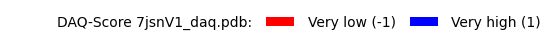

In [13]:
#@title Structure Quality Visualization (3D) <a name="Visualization"></a>
if EXE_DAQ_SCORING:
  import os
  import matplotlib.pyplot as plt
  def plot_plddt_legend(mid=""):
    thresh = [f'DAQ-Score {mid}:','Very low (-1)','Very high (1)']
    plt.figure(figsize=(1,0.1),dpi=100)
    ########################################
    for c in ["#FFFFFF","#FF0000","#0000FF"]:
      plt.bar(0, 0, color=c)
    plt.legend(thresh, frameon=False,
              loc='center', ncol=6,
              handletextpad=1,
              columnspacing=1,
              markerscale=0.5,)
    plt.axis(False)
    return plt
  #exit()
  #Visualize
  import py3Dmol
  def show_pdb(output_pdb_path):
    view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
    view.addModel(open(output_pdb_path,'r').read(),'pdb')
    view.setStyle({'cartoon': {'colorscheme': {'prop':'b','gradient':'rwb','min':-1,'max':1}}})
    #view.setStyle({'cartoon': {'color':'spectrumb'}})
    #view.setStyle({'cartoon': {'spectrum': {'prop':'b','min':-1,'max':1}}})
    view.zoomTo()
    return view

  for daq_model in scored_list:
    #print(f"Visualizing {daq_model}")
    show_pdb(daq_model).show()
    plot_plddt_legend(mid=daq_model.split("/")[-1]).show()
  #show_pdb(final_pdb_path).show()


In [14]:
#@title Download Output Files <a name="Download"></a>
#@markdown The pdb file with estimated score will be compressed and downloaded. You can visualize your structure score by Pymol.
import zipfile
from pathlib import Path
from google.colab import files

# paths
out_root = Path("/content/OutPuts")
models_dir = out_root / "models"
npy_files = list(out_root.rglob("*ATOM_SS.npy"))

zip_path = Path("/content/DAQ_results.zip")

# sanity check
if EXE_DAQ_SCORING and not models_dir.exists():
    raise RuntimeError("models/ directory not found.")

if not npy_files:
    raise RuntimeError("No .npy files found in OutPuts.")

# create zip
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as z:
    # add models directory (recursive)
    for p in models_dir.rglob("*"):
        if p.is_file():
            z.write(p, arcname=p.relative_to(out_root))

    # add npy files
    for p in npy_files:
        z.write(p, arcname=p.relative_to(out_root))

print(f"ZIP created: {zip_path}")

# trigger download
files.download(str(zip_path))



ZIP created: /content/DAQ_results.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Citation: <a name="Citation"></a>

Genki Terashi* , Xiao Wang*, Sai Raghavendra Maddhuri Venkata Subramaniya, John J. G. Tesmer & Daisuke Kihara. Residue-Wise Local Quality Estimation for Protein Models from Cryo-EM Maps. Nature Methods 19, 1116-1125 (2022).
```
@article{terashi2022residue,
  title={Residue-wise local quality estimation for protein models from cryo-EM maps},
  author={Terashi, Genki and Wang, Xiao and Maddhuri Venkata Subramaniya, Sai Raghavendra and Tesmer, John JG and Kihara, Daisuke},
  journal={Nature Methods},
  volume={19},
  number={9},
  pages={1116--1125},
  year={2022},
  publisher={Nature Publishing Group US New York}
}
```